In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

from IPython.display import display
import math
import re

from pymystem3 import Mystem

import swifter

import string
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer 

In [101]:
processed_dfs={
    "drom":{"df_processed":pd.read_csv("..\\data\\processed\\df_processed_drom.csv")},
    "etlib":{"df_processed":pd.read_csv("..\\data\\processed\\df_processed_etlib.csv")}
}
processed_dfs

{'drom': {'df_processed':        Unnamed: 0                                            problem  \
  0               0  Добрый.... подскажите пожалуйста, в чем причин...   
  1               1  Как снять впускной колектор на икстрейле двс Q...   
  2               2  ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...   
  3               3  Неработает сенсор монитора управления печкой, ...   
  4               4                    На сколько литров топливный бак   
  ...           ...                                                ...   
  45904       45904  Приветствую!\n\nОн так и должен работать или э...   
  45905       45905  Авенсис Версо 03 года бензин 1AZ-FE. Случилось...   
  45906       45906  Досталася Ипсум 2002гв 2,4л\nИ так по порядку....   
  45907       45907  Так то в машинах разбираюсь, но хочу спросить ...   
  45908       45908  при движении от 30 до 40 кмч что то воет на 80...   
  
                                                  solution       brand  \
  0      До

### Statistical processing

drom


,brand,counts
73,Toyota,15578
54,Nissan,6475
53,Mitsubishi,3659
35,Honda,3500
50,Mazda,2481
...,...,...
20,Derways,1
30,Geo,1
2,Asia,1
64,Saturn,1


,brand,counts
73,Toyota,15578
54,Nissan,6475
53,Mitsubishi,3659
35,Honda,3500
50,Mazda,2481
81,Лада,2426
69,Subaru,1253
37,Hyundai,1052
70,Suzuki,781
74,Volkswagen,776


etlib


,brand,counts
51,ВАЗ (Lada),6209
49,Volkswagen,4229
48,Toyota,3378
35,Opel,2955
14,Ford,2923
...,...,...
57,Масла и жидкости,1
30,MINI,1
59,Освещение,1
60,Охлаждение и отопление,1


,brand,counts
51,ВАЗ (Lada),6209
49,Volkswagen,4229
48,Toyota,3378
35,Opel,2955
14,Ford,2923
2,Audi,2392
34,Nissan,2314
38,Renault,1895
32,Mercedes,1459
18,Hyundai,1359


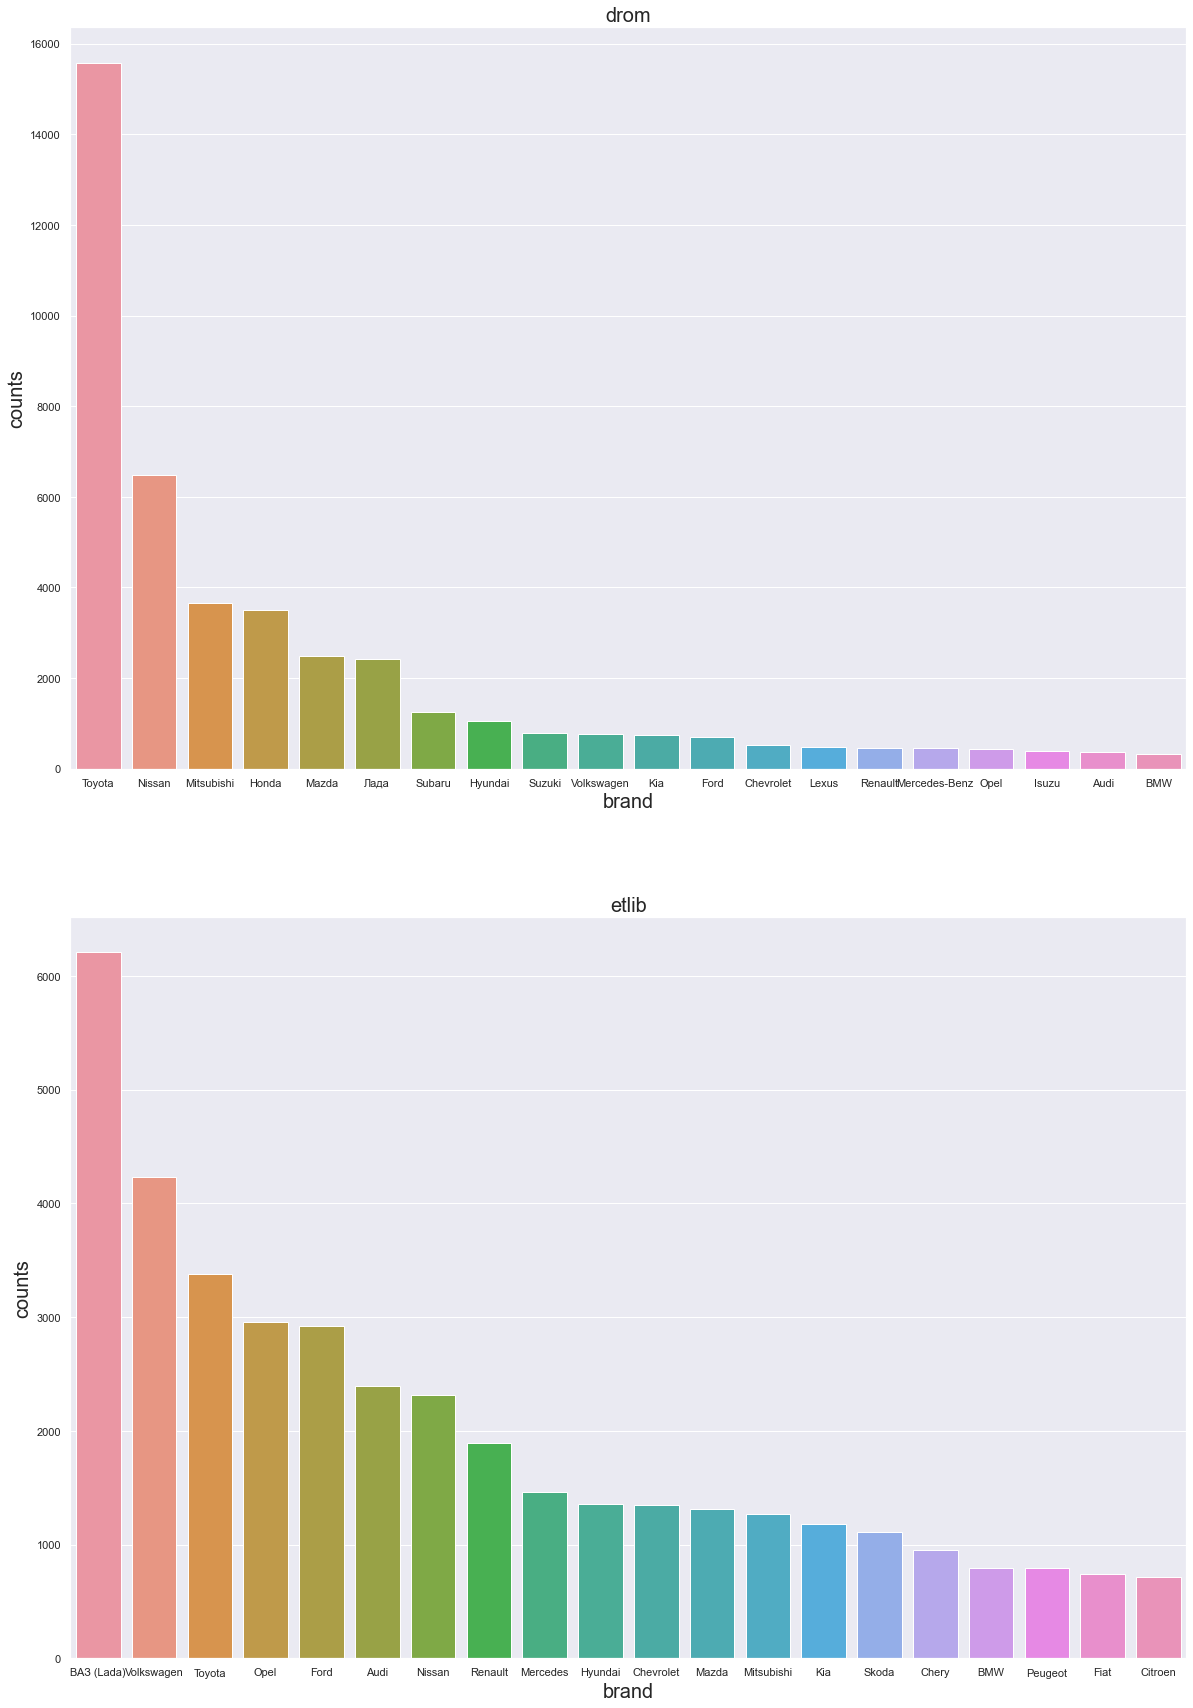

In [102]:
sns.set(rc={'figure.figsize':(20,15*len(processed_dfs)),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
ploti=1


for key in processed_dfs:
    df_processed=processed_dfs[key]["df_processed"]
    
    df_brands=df_processed.groupby("brand").size().reset_index(name='counts')
    df_brands=df_brands.sort_values(by="counts",ascending=False)
    
    processed_dfs[key]["df_brands"]=df_brands
    print(key)
    display(df_brands)

    #for top 20 brands by count of pairs
    df_brands_top_20=df_brands.head(20)
    processed_dfs[key]["df_brands_top_20"]=df_brands_top_20
    display(df_brands_top_20)

    plt.subplot(len(processed_dfs),1,ploti)
    sns.barplot(x=df_brands_top_20.brand,y=df_brands_top_20.counts).set(title=key)

    ploti+=1

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

drom


,model,counts
305,Corolla,1253
247,Camry,1234
1092,X-Trail,1056
551,Ipsum,925
667,Mark II,784
...,...,...
135,Alpheon,1
996,Tiburon,1
997,Tiggo 2,1
281,Chrysler,1


,model,counts
305,Corolla,1253
247,Camry,1234
1092,X-Trail,1056
551,Ipsum,925
667,Mark II,784
231,CR-V,642
607,Land Cruiser Prado,536
441,Forester,491
309,Corolla Fielder,478
753,Pajero,475


etlib


,model,counts
365,Focus,1365
584,Passat,1276
147,Astra,919
393,Golf,766
813,Vectra,742
...,...,...
244,Clarus,1
628,QX,1
241,Citivan,1
784,TrailBlazer,1


,model,counts
365,Focus,1365
584,Passat,1276
147,Astra,919
393,Golf,766
813,Vectra,742
106,A6,711
561,Octavia,654
33,2110,627
35,2112,619
255,Corolla,573


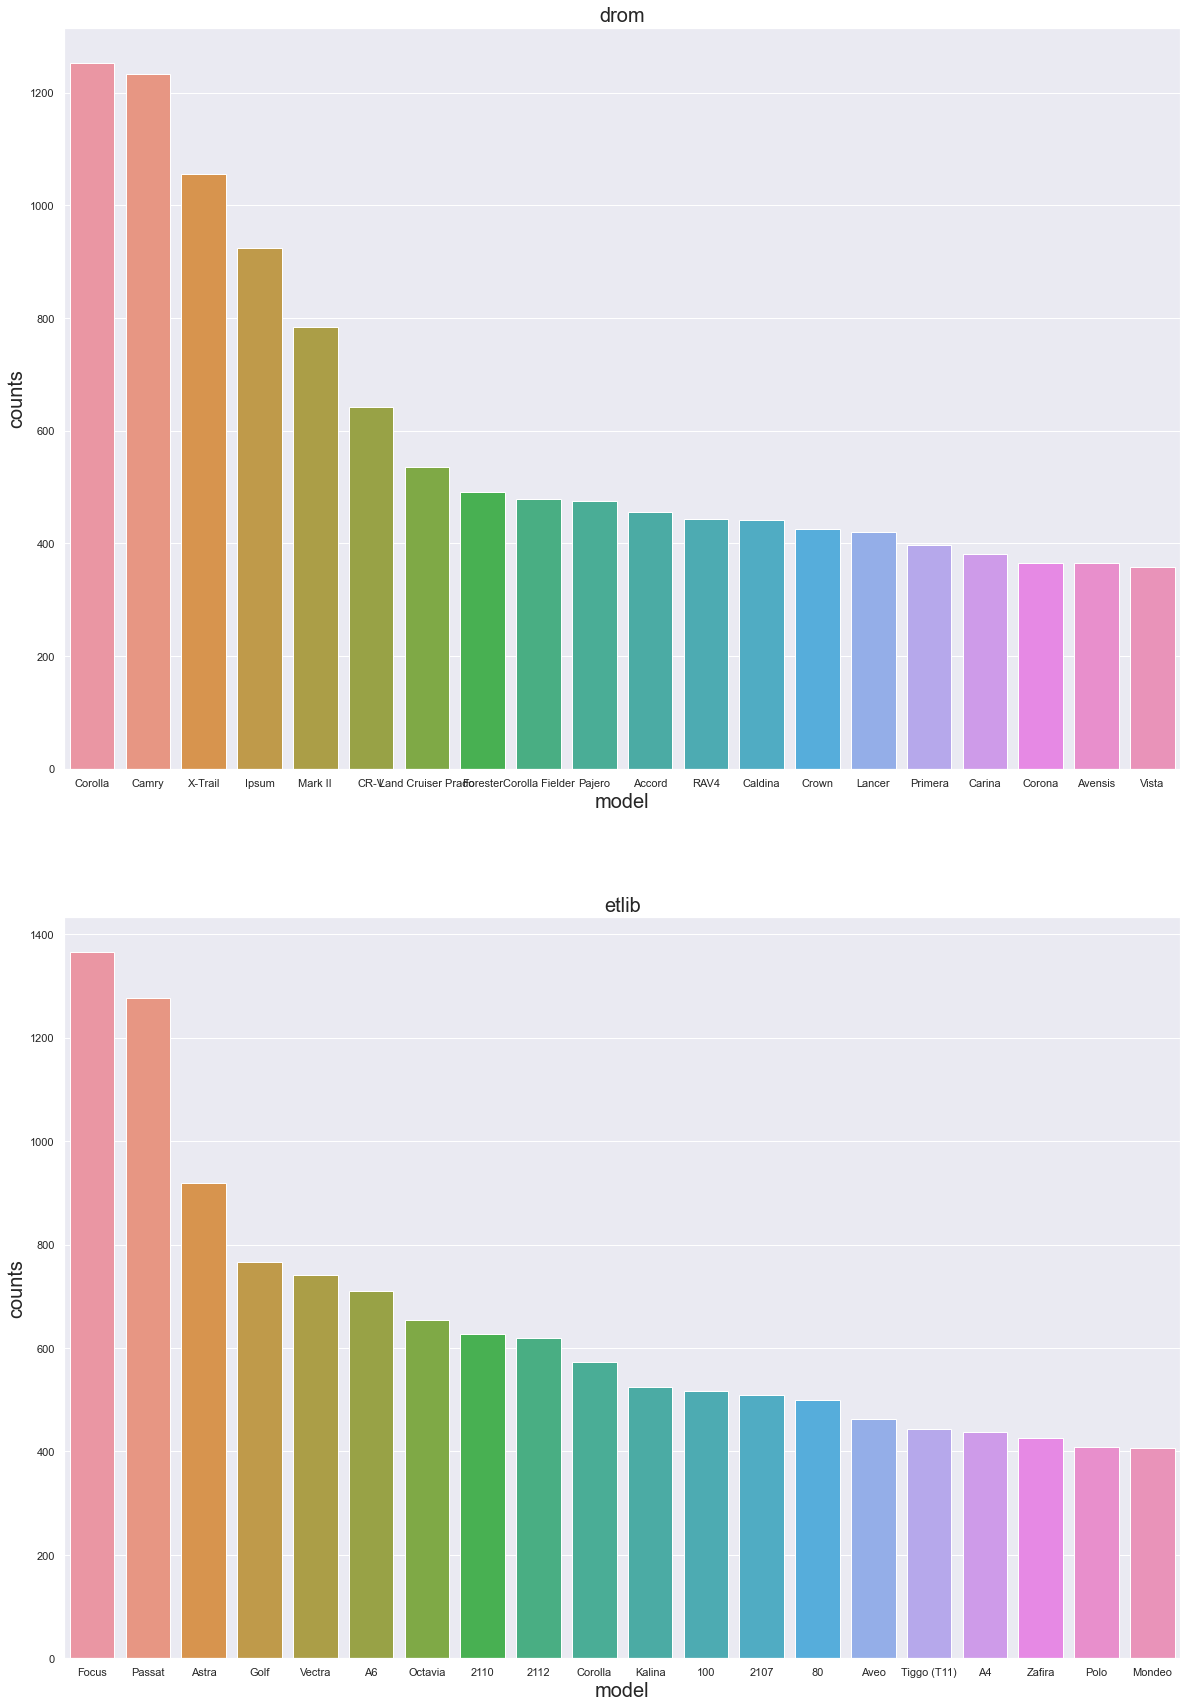

In [103]:
sns.set(rc={'figure.figsize':(20,15*len(processed_dfs)),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
ploti=1

for key in processed_dfs:
    df_processed=processed_dfs[key]["df_processed"]
    

    #The same for models
    df_models=df_processed.groupby("model").size().reset_index(name='counts')
    df_models=df_models.sort_values(by="counts",ascending=False)

    processed_dfs[key]["df_models"]=df_models
    print(key)
    display(df_models)

    #for top 20 model by count of pairs
    df_models_top_20=df_models.head(20)
    processed_dfs[key]["df_models_top_20"]=df_models_top_20
    display(df_models_top_20)

    plt.subplot(len(processed_dfs),1,ploti)
    sns.barplot(x=df_models_top_20.model,y=df_models_top_20.counts).set(title=key)

    ploti+=1

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

drom


,year,counts
30,2001,2463
37,2008,2276
29,2000,2229
27,1998,2213
28,1999,2139
31,2002,2012
36,2007,1965
32,2003,1820
26,1997,1709
35,2006,1656


,year,counts
11,1982,7
8,1979,3
6,1977,3
7,1978,2
2,1972,2
1,1971,1
10,1981,1
5,1976,1
4,1975,1
3,1973,1


,year,counts
30,2001,2463
37,2008,2276
29,2000,2229
27,1998,2213
28,1999,2139
31,2002,2012
36,2007,1965
32,2003,1820
26,1997,1709
35,2006,1656


etlib


,year,counts
27,1997,3232
34,2004,2807
36,2006,2433
35,2005,2406
28,1998,2153
33,2003,2150
37,2007,2060
32,2002,1995
26,1996,1844
24,1994,1644


,year,counts
2,1972,49
46,2016,41
9,1979,38
47,2017,37
5,1975,21
48,2018,16
4,1974,7
6,1976,6
1,1971,4
3,1973,2


,year,counts
27,1997,3232
34,2004,2807
36,2006,2433
35,2005,2406
28,1998,2153
33,2003,2150
37,2007,2060
32,2002,1995
26,1996,1844
24,1994,1644


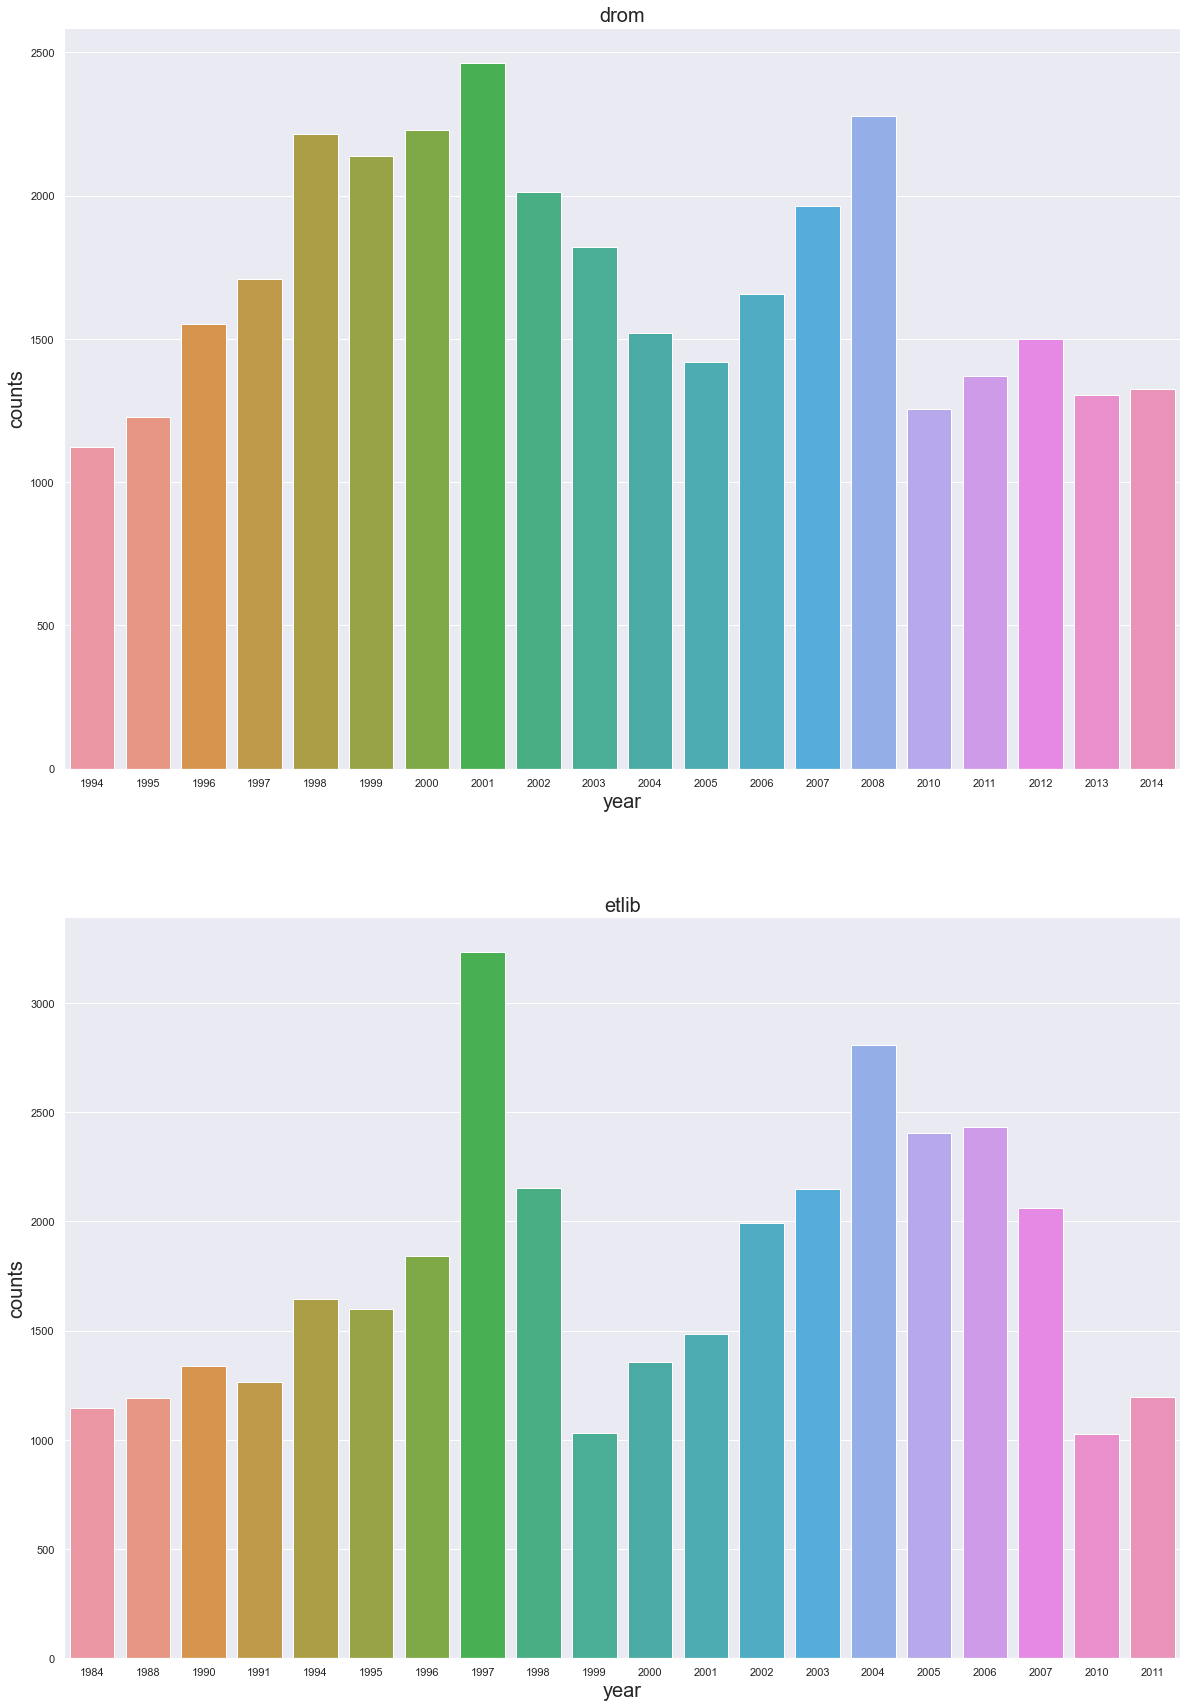

In [104]:
sns.set(rc={'figure.figsize':(20,15*len(processed_dfs)),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
ploti=1

for key in processed_dfs:
    df_processed=processed_dfs[key]["df_processed"]

    #The same for years
    df_years=df_processed.groupby("year").size().reset_index(name='counts')
    df_years.year=df_years.year.astype("Int64")
    df_years=df_years.sort_values(by="counts",ascending=False)

    processed_dfs[key]["df_years"]=df_years
    print(key)
    display(df_years.head(10))
    display(df_years.tail(10))


    #for top 20 year by count of pairs
    df_years_top_20=df_years.head(20)
    processed_dfs[key]["df_years_top_20"]=df_years_top_20
    display(df_years_top_20)

    plt.subplot(len(processed_dfs),1,ploti)
    sns.barplot(x=df_years_top_20.year,y=df_years_top_20.counts).set(title=key)

    ploti+=1

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

In [105]:
for key in processed_dfs:
    df_processed=processed_dfs[key]["df_processed"]

    df_brand_model=df_processed.groupby(["brand","model"]).size().reset_index(name='counts')

    processed_dfs[key]["df_brand_model"]=df_brand_model
    display(df_brand_model)

,brand,model,counts
0,Acura,CL,1
1,Acura,ILX,1
2,Acura,MDX,12
3,Acura,RDX,1
4,Acura,RSX,1
...,...,...,...
1198,УАЗ,Патриот,117
1199,УАЗ,Пикап,4
1200,УАЗ,Профи,5
1201,УАЗ,УАЗ,10


,brand,model,counts
0,Acura,CL,8
1,Acura,CSX,1
2,Acura,Legend,1
3,Acura,MDX,1
4,Acura,RL,1
...,...,...,...
934,УАЗ,3159,1
935,УАЗ,469,8
936,УАЗ,Hunter,7
937,УАЗ,Patriot,35


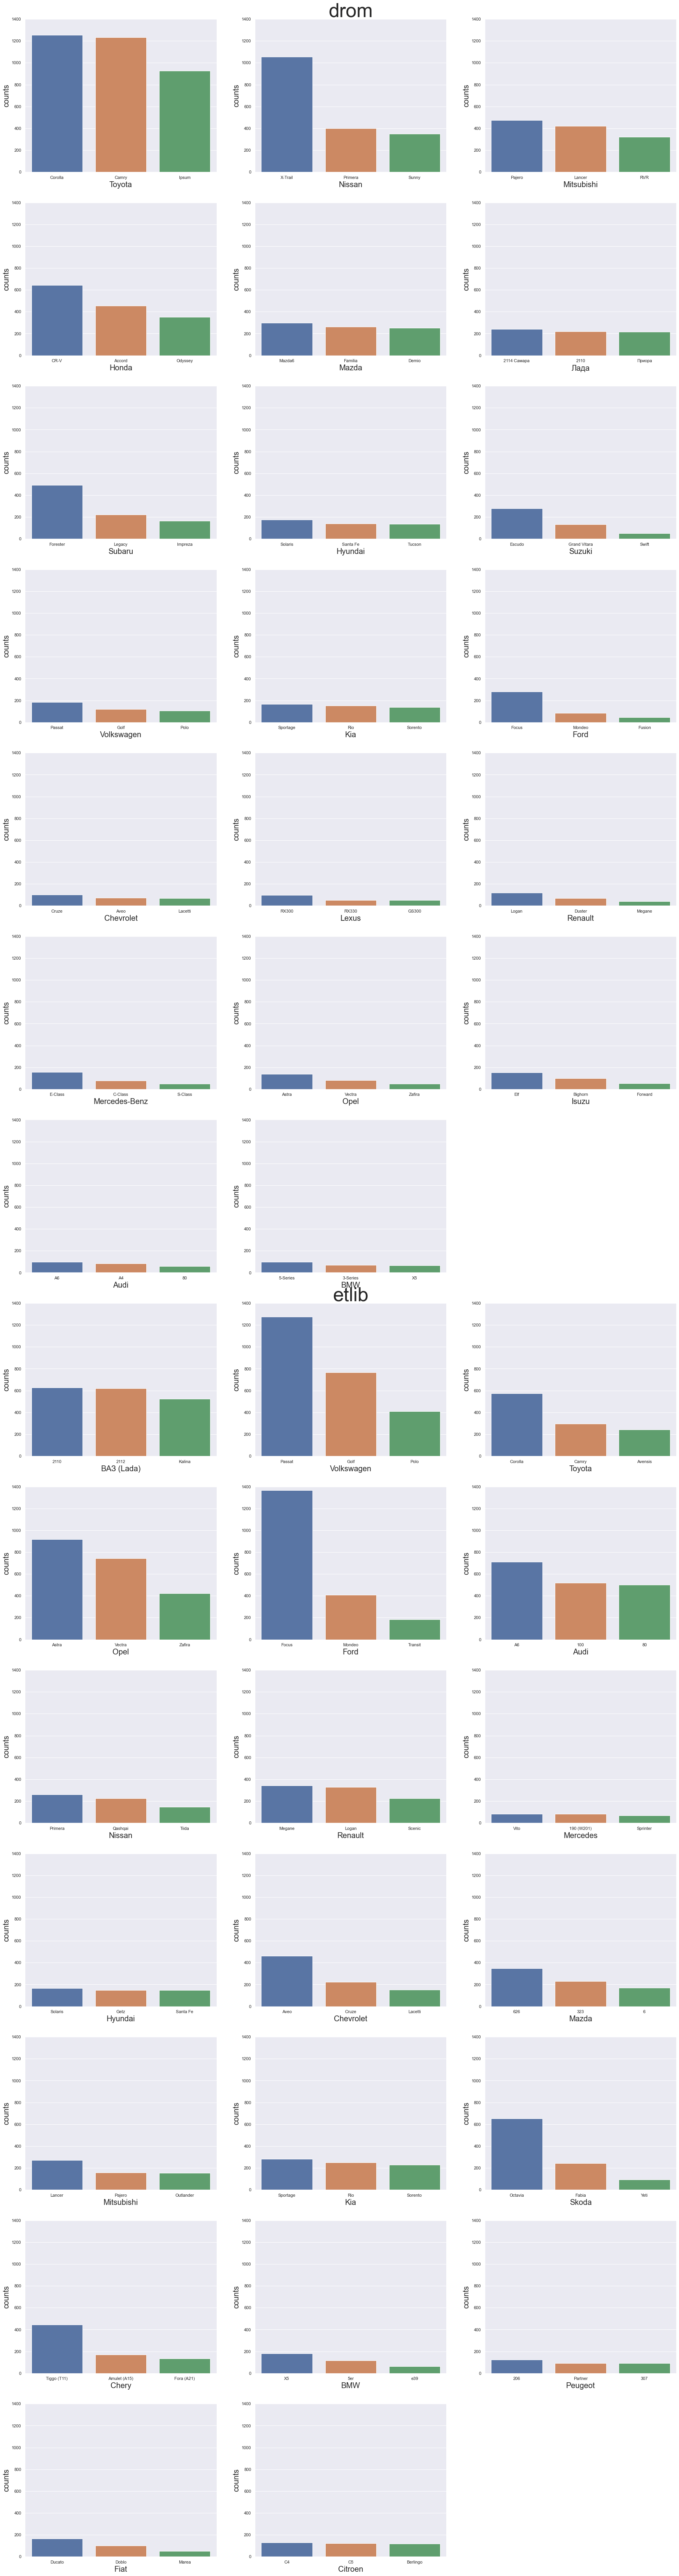

In [106]:
#Top 3 models for every brand from top 20
sns.set(rc={'figure.figsize':(30,60*len(processed_dfs)),"font.size":20,"axes.titlesize":50,"axes.labelsize":20})
ploti=0

for key in processed_dfs:
    df_brands_top_20=processed_dfs[key]["df_brands_top_20"]
    df_brand_model=processed_dfs[key]["df_brand_model"]

    for i in range(0,20):
        plt.subplot(7*len(processed_dfs),3,i+ploti*21+1)

        brand_i=df_brands_top_20.iloc[i,:].brand

        brand_i_models=df_brand_model[df_brand_model.brand==brand_i].sort_values(by="counts",ascending=False).head(3)
        
        ax=sns.barplot(x=brand_i_models.model,y=brand_i_models.counts)
        ax.set_xlabel(brand_i)
        #fix y limit to compare counts
        ax.set_ylim(0,1400)

        if(i==1):
            ax.set_title(key)
    
    ploti+=1

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})


In [107]:
for key in processed_dfs:
    df_processed=processed_dfs[key]["df_processed"]

    df_brand_year=df_processed.groupby(["brand","year"]).size().reset_index(name='counts')

    processed_dfs[key]["df_brand_year"]=df_brand_year
    display(df_brand_year)

,brand,year,counts
0,Acura,1994.0,1
1,Acura,2000.0,1
2,Acura,2002.0,2
3,Acura,2003.0,1
4,Acura,2005.0,4
...,...,...,...
1280,УАЗ,2016.0,7
1281,УАЗ,2017.0,20
1282,УАЗ,2018.0,9
1283,УАЗ,2019.0,5


,brand,year,counts
0,Acura,1990.0,1
1,Acura,1996.0,8
2,Acura,2000.0,1
3,Acura,2005.0,1
4,Acura,2006.0,1
...,...,...,...
856,УАЗ,1985.0,8
857,УАЗ,1999.0,1
858,УАЗ,2003.0,8
859,УАЗ,2005.0,36


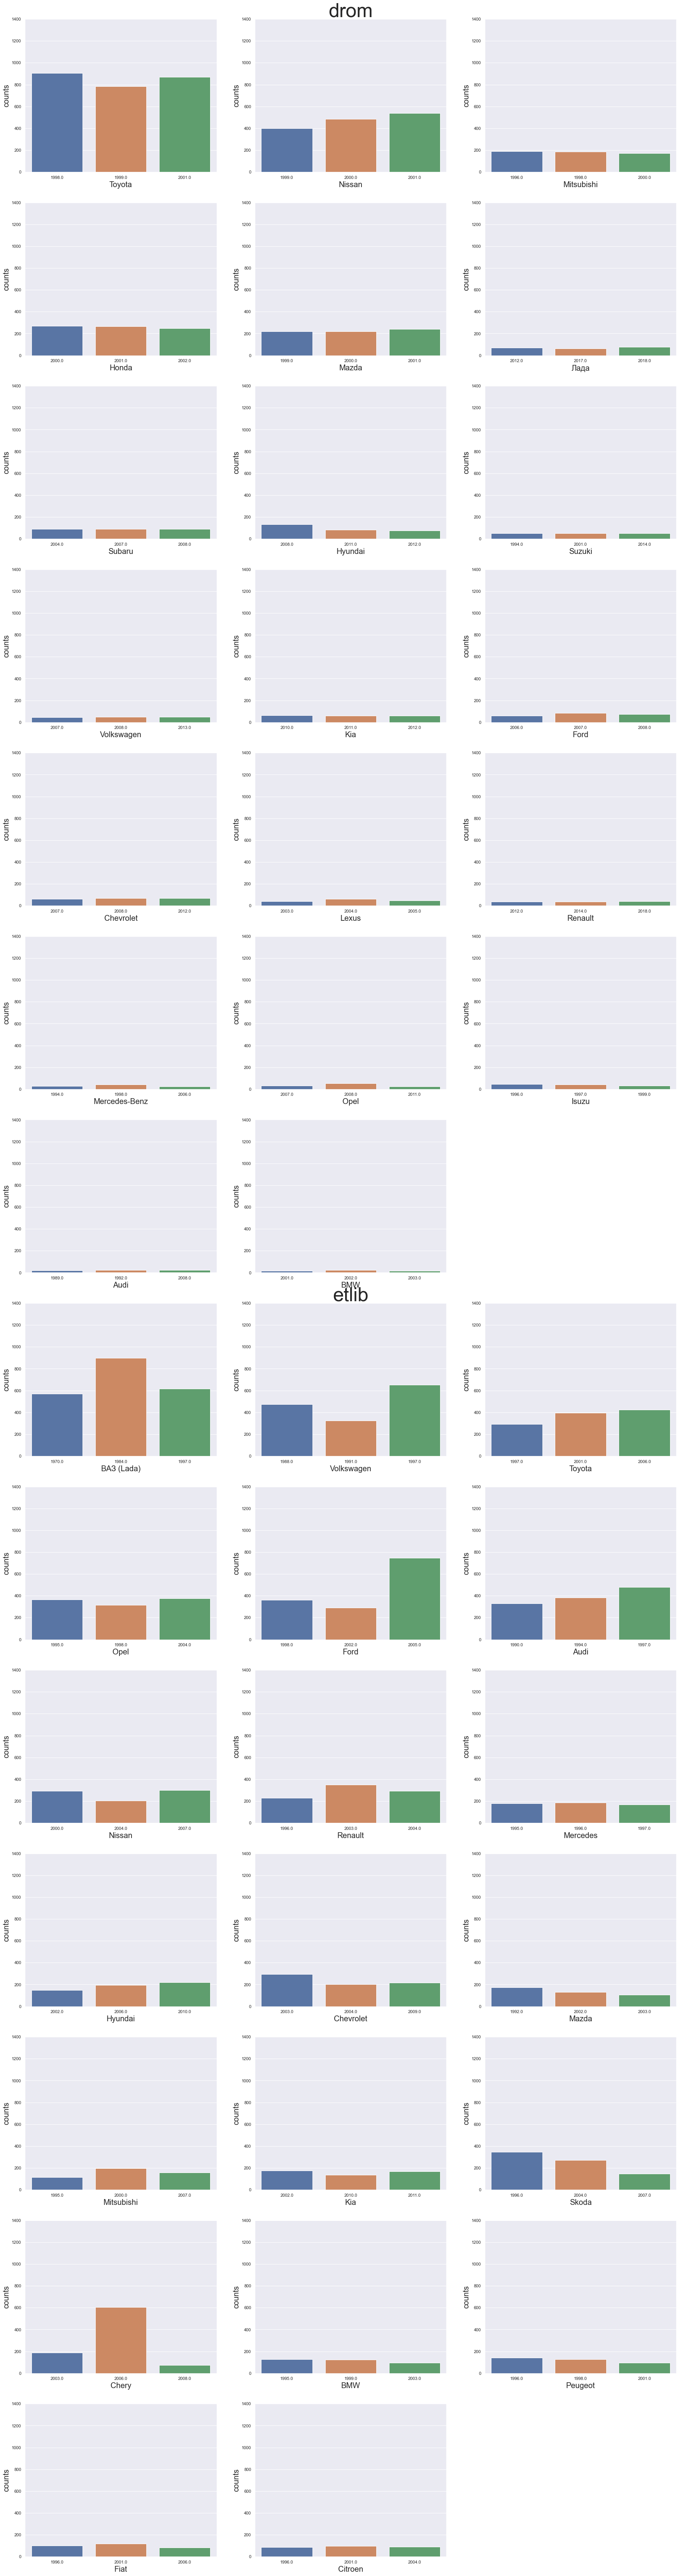

In [108]:
#Top 3 years for every brand from top 20
sns.set(rc={'figure.figsize':(30,60*len(processed_dfs)),"font.size":20,"axes.titlesize":50,"axes.labelsize":20})
ploti=0

for key in processed_dfs:
    df_brands_top_20=processed_dfs[key]["df_brands_top_20"]
    df_brand_year=processed_dfs[key]["df_brand_year"]

    for i in range(0,20):
        plt.subplot(7*len(processed_dfs),3,i+ploti*21+1)

        brand_i=df_brands_top_20.iloc[i,:].brand

        brand_i_years=df_brand_year[df_brand_year.brand==brand_i].sort_values(by="counts",ascending=False).head(3)
        
        ax=sns.barplot(x=brand_i_years.year,y=brand_i_years.counts)
        ax.set_xlabel(brand_i)
        #fix y limit to compare counts
        ax.set_ylim(0,1400)
        
        if(i==1):
            ax.set_title(key)

    ploti+=1
    
sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

<h3>We want to get word frequency for tokenized stemming words w/o stopwords and punctuation in problem and solution columns

In [109]:
#lemmatization Mystem
#TODO: check execution time for PyMorphy2
''' It requires at least 25 hours for my pc :(

print("problem_lemm:")
df_processed["problem_lemm"]=df_processed["problem"].swifter.apply(lambda x:Mystem().lemmatize(x))

print("solution_lemm")
df_processed["solution_lemm"]=df_processed["solution"].swifter.apply(lambda x:Mystem().lemmatize(x))
df_processed
'''

' It requires at least 25 hours for my pc :(\n\nprint("problem_lemm:")\ndf_processed["problem_lemm"]=df_processed["problem"].swifter.apply(lambda x:Mystem().lemmatize(x))\n\nprint("solution_lemm")\ndf_processed["solution_lemm"]=df_processed["solution"].swifter.apply(lambda x:Mystem().lemmatize(x))\ndf_processed\n'

In [110]:
#russian stopwords and punctuation

#stops=list(stopwords.words("russian"))
#If we use default russian stopwords, we will clear some of our solution only with words ["да","нет","можно","конечно","эти", "это", "этот", "эта", "так"] and etc.
stops=["на","и","не","в", "как", "с", "что", "при", "у", "а", "но", "то","кто", "по", "ли", "если", "от", "я"]

stops_punct=set(stops+list(string.punctuation))

for key in processed_dfs:
    df_processed=processed_dfs[key]["df_processed"]

    df_processed["problem_tokens"]=df_processed["problem"].swifter.apply(lambda x:[i for i in wordpunct_tokenize(x.lower()) if i not in stops_punct],axis=1)

    df_processed["solution_tokens"]=df_processed["solution"].swifter.apply(lambda x:[i for i in wordpunct_tokenize(x.lower()) if i not in stops_punct],axis=1)

    print(key)
    display(df_processed)

C:\Users\Oleg\Anaconda3\lib\site-packages\swifter\swifter.py:215: UserWarning: Axis keyword not necessary because applying on a Series.
  warnings.warn("Axis keyword not necessary because applying on a Series.")
Pandas Apply: 100%|██████████| 45909/45909 [00:01<00:00, 22979.95it/s]

drom


,Unnamed: 0,problem,solution,brand,model,year,problem_tokens,solution_tokens
0,0,"Добрый.... подскажите пожалуйста, в чем причин...","Добрый. Нет, это не катализатор, если проблема...",Kia,Sorento,2013.0,"[добрый, ...., подскажите, пожалуйста, чем, пр...","[добрый, нет, это, катализатор, проблема, нём,..."
1,1,Как снять впускной колектор на икстрейле двс Q...,Ручками и инструментом! Или обращаются в Серви...,Nissan,X-Trail,2005.0,"[снять, впускной, колектор, икстрейле, двс, qr...","[ручками, инструментом, или, обращаются, серви..."
2,2,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"Здравствуйте. Ну, можно попробовать поставить ...",Volkswagen,Golf,2007.0,"[здравствуйте, скажите, какой, компрессор, кон...","[здравствуйте, ну, можно, попробовать, постави..."
3,3,"Неработает сенсор монитора управления печкой, ...","Прочитал на одном форуме интересное правило: ""...",Toyota,Crown,2000.0,"[неработает, сенсор, монитора, управления, печ...","[прочитал, одном, форуме, интересное, правило,..."
4,4,На сколько литров топливный бак,55 л,Toyota,Corolla,2005.0,"[сколько, литров, топливный, бак]","[55, л]"
...,...,...,...,...,...,...,...,...
45904,45904,Приветствую!\n\nОн так и должен работать или э...,Короб фильтра подтяни и забей. Это норм Подушк...,Toyota,ist,NaN,"[приветствую, он, так, должен, работать, или, ...","[короб, фильтра, подтяни, забей, это, норм, по..."
45905,45905,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,И Вам здравствовать!\nСкорее всего не было кон...,Toyota,Avensis Verso,NaN,"[авенсис, версо, 03, года, бензин, 1az, fe, сл...","[вам, здравствовать, скорее, всего, было, конт..."
45906,45906,"Досталася Ипсум 2002гв 2,4л\nИ так по порядку....",И Вам доброго!\n1. Одному Богу известно.\n2. А...,Toyota,Ipsum,NaN,"[досталася, ипсум, 2002гв, 2, 4л, так, порядку...","[вам, доброго, 1, одному, богу, известно, 2, м..."
45907,45907,"Так то в машинах разбираюсь, но хочу спросить ...",666_Ghost-Basters_666;1 151106709:говорят пере...,Лада,4x4 2121 Нива,NaN,"[так, машинах, разбираюсь, хочу, спросить, нив...","[666_ghost, basters_666, 1, 151106709, говорят..."


Pandas Apply: 100%|██████████| 45439/45439 [00:01<00:00, 27643.98it/s]

etlib


,Unnamed: 0,problem,solution,brand,model,year,problem_tokens,solution_tokens
0,0,Здравствуйте. В общем день не задался. Ехал со...,Можно проверить на шиномонтажке геометрию дис...,ВАЗ (Lada),Priora,2007.0,"[здравствуйте, общем, день, задался, ехал, со,...","[можно, проверить, шиномонтажке, геометрию, ди..."
1,1,"Уважаемые специалисты подскажите пожалуйста, м...",Всё сделали не так. У вас на кнопку не приход...,Mazda,323,1985.0,"[уважаемые, специалисты, подскажите, пожалуйст...","[всё, сделали, так, вас, кнопку, приходит, 12,..."
2,2,Нужен артикул запчасти ремкомплект заднего лев...,Артикул D4632и направляющие,SsangYong,Actyon,2010.0,"[нужен, артикул, запчасти, ремкомплект, заднег...","[артикул, d4632и, направляющие]"
3,3,Не горят половина контрольных ламп. Менял щито...,"Тогда нужно проверить разъем, провода щитка п...",Chevrolet,Aveo,2003.0,"[горят, половина, контрольных, ламп, менял, щи...","[тогда, нужно, проверить, разъем, провода, щит..."
4,4,Здравствуйте! Как проверить уровень жидкости в...,"Щуп он либо есть. Либо его нет, чтобы владеле...",Nissan,Qashqai,2007.0,"[здравствуйте, проверить, уровень, жидкости, в...","[щуп, он, либо, есть, либо, его, нет, чтобы, в..."
...,...,...,...,...,...,...,...,...
45434,45434,Де знаходиться кнопка та шо отключає подачу па...,"Подушки сработали? Если да, то подачу топлива...",Renault,Laguna,2007.0,"[де, знаходиться, кнопка, та, шо, отключає, по...","[подушки, сработали, да, подачу, топлива, може..."
45435,45435,Не включается вентилятор при нагреве двигателя...,"Проверьте предохранитель, далее сам вентилято...",Opel,Kadett,1984.0,"[включается, вентилятор, нагреве, двигателя, в...","[проверьте, предохранитель, далее, сам, вентил..."
45436,45436,Добрый день.\n\nПодыскиваю себе пару передних ...,Нормальный выбор тормозных дисков. TRW — это ...,Honda,Accord,2002.0,"[добрый, день, подыскиваю, себе, пару, передни...","[нормальный, выбор, тормозных, дисков, trw, —,..."
45437,45437,Почему на панели где показывает скорости морга...,"Что мигает? , Что там на панели моргает? , ...",Honda,Civic,2006.0,"[почему, панели, где, показывает, скорости, мо...","[мигает, там, панели, моргает, очень, часто, т..."


In [111]:
for key in processed_dfs:
    df_processed=processed_dfs[key]["df_processed"]
    
    #drop pairs problem-solution w/o problem or solution tokens (exept stop words and punctuation tokens)
    df_processed=df_processed.dropna(axis=0,subset=["problem_tokens","solution_tokens"]).reset_index(drop=True)
    df_processed=df_processed.drop(
        df_processed[(df_processed["problem_tokens"].apply(len)==0)|(df_processed["solution_tokens"].apply(len)==0)].index
        ).reset_index(drop=True)
        
    print(key)
    display(df_processed)

drom


,Unnamed: 0,problem,solution,brand,model,year,problem_tokens,solution_tokens
0,0,"Добрый.... подскажите пожалуйста, в чем причин...","Добрый. Нет, это не катализатор, если проблема...",Kia,Sorento,2013.0,"[добрый, ...., подскажите, пожалуйста, чем, пр...","[добрый, нет, это, катализатор, проблема, нём,..."
1,1,Как снять впускной колектор на икстрейле двс Q...,Ручками и инструментом! Или обращаются в Серви...,Nissan,X-Trail,2005.0,"[снять, впускной, колектор, икстрейле, двс, qr...","[ручками, инструментом, или, обращаются, серви..."
2,2,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"Здравствуйте. Ну, можно попробовать поставить ...",Volkswagen,Golf,2007.0,"[здравствуйте, скажите, какой, компрессор, кон...","[здравствуйте, ну, можно, попробовать, постави..."
3,3,"Неработает сенсор монитора управления печкой, ...","Прочитал на одном форуме интересное правило: ""...",Toyota,Crown,2000.0,"[неработает, сенсор, монитора, управления, печ...","[прочитал, одном, форуме, интересное, правило,..."
4,4,На сколько литров топливный бак,55 л,Toyota,Corolla,2005.0,"[сколько, литров, топливный, бак]","[55, л]"
...,...,...,...,...,...,...,...,...
45897,45904,Приветствую!\n\nОн так и должен работать или э...,Короб фильтра подтяни и забей. Это норм Подушк...,Toyota,ist,NaN,"[приветствую, он, так, должен, работать, или, ...","[короб, фильтра, подтяни, забей, это, норм, по..."
45898,45905,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,И Вам здравствовать!\nСкорее всего не было кон...,Toyota,Avensis Verso,NaN,"[авенсис, версо, 03, года, бензин, 1az, fe, сл...","[вам, здравствовать, скорее, всего, было, конт..."
45899,45906,"Досталася Ипсум 2002гв 2,4л\nИ так по порядку....",И Вам доброго!\n1. Одному Богу известно.\n2. А...,Toyota,Ipsum,NaN,"[досталася, ипсум, 2002гв, 2, 4л, так, порядку...","[вам, доброго, 1, одному, богу, известно, 2, м..."
45900,45907,"Так то в машинах разбираюсь, но хочу спросить ...",666_Ghost-Basters_666;1 151106709:говорят пере...,Лада,4x4 2121 Нива,NaN,"[так, машинах, разбираюсь, хочу, спросить, нив...","[666_ghost, basters_666, 1, 151106709, говорят..."


etlib


,Unnamed: 0,problem,solution,brand,model,year,problem_tokens,solution_tokens
0,0,Здравствуйте. В общем день не задался. Ехал со...,Можно проверить на шиномонтажке геометрию дис...,ВАЗ (Lada),Priora,2007.0,"[здравствуйте, общем, день, задался, ехал, со,...","[можно, проверить, шиномонтажке, геометрию, ди..."
1,1,"Уважаемые специалисты подскажите пожалуйста, м...",Всё сделали не так. У вас на кнопку не приход...,Mazda,323,1985.0,"[уважаемые, специалисты, подскажите, пожалуйст...","[всё, сделали, так, вас, кнопку, приходит, 12,..."
2,2,Нужен артикул запчасти ремкомплект заднего лев...,Артикул D4632и направляющие,SsangYong,Actyon,2010.0,"[нужен, артикул, запчасти, ремкомплект, заднег...","[артикул, d4632и, направляющие]"
3,3,Не горят половина контрольных ламп. Менял щито...,"Тогда нужно проверить разъем, провода щитка п...",Chevrolet,Aveo,2003.0,"[горят, половина, контрольных, ламп, менял, щи...","[тогда, нужно, проверить, разъем, провода, щит..."
4,4,Здравствуйте! Как проверить уровень жидкости в...,"Щуп он либо есть. Либо его нет, чтобы владеле...",Nissan,Qashqai,2007.0,"[здравствуйте, проверить, уровень, жидкости, в...","[щуп, он, либо, есть, либо, его, нет, чтобы, в..."
...,...,...,...,...,...,...,...,...
45429,45434,Де знаходиться кнопка та шо отключає подачу па...,"Подушки сработали? Если да, то подачу топлива...",Renault,Laguna,2007.0,"[де, знаходиться, кнопка, та, шо, отключає, по...","[подушки, сработали, да, подачу, топлива, може..."
45430,45435,Не включается вентилятор при нагреве двигателя...,"Проверьте предохранитель, далее сам вентилято...",Opel,Kadett,1984.0,"[включается, вентилятор, нагреве, двигателя, в...","[проверьте, предохранитель, далее, сам, вентил..."
45431,45436,Добрый день.\n\nПодыскиваю себе пару передних ...,Нормальный выбор тормозных дисков. TRW — это ...,Honda,Accord,2002.0,"[добрый, день, подыскиваю, себе, пару, передни...","[нормальный, выбор, тормозных, дисков, trw, —,..."
45432,45437,Почему на панели где показывает скорости морга...,"Что мигает? , Что там на панели моргает? , ...",Honda,Civic,2006.0,"[почему, панели, где, показывает, скорости, мо...","[мигает, там, панели, моргает, очень, часто, т..."


In [112]:
for key in processed_dfs:
    df_processed=processed_dfs[key]["df_processed"]

    #count word frequency (total) by stack every word in one Series and count number of every token in it
    counts_problem=df_processed.problem_tokens.swifter.apply(pd.Series).stack().value_counts().reset_index()
    counts_problem.columns = ['word', 'frequency']

    processed_dfs[key]["counts_problem"]=counts_problem
    
    print(key)
    display(counts_problem)

Pandas Apply: 100%|██████████| 45909/45909 [00:21<00:00, 2185.74it/s] 


drom


,word,frequency
0,подскажите,19451
1,может,14231
2,все,11138
3,здравствуйте,9202
4,пожалуйста,9132
...,...,...
81356,аналоговой,1
81357,mc3,1
81358,вибрацыи,1
81359,осмотрев,1


Pandas Apply: 100%|██████████| 45439/45439 [00:14<00:00, 3145.45it/s] 


etlib


,word,frequency
0,2,8622
1,двигатель,7310
2,может,7273
3,после,6614
4,1,6388
...,...,...
55519,скинте,1
55520,ненадлежащее,1
55521,катайся,1
55522,спят,1


Pandas Apply: 100%|██████████| 81361/81361 [00:04<00:00, 20037.03it/s]

drom


,word,frequency
0,подскаж,19534
1,так,16476
2,машин,14896
3,может,14456
4,все,13739
...,...,...
45607,подд,1
45608,бвигател,1
45609,поддава,1
45610,поддавлен,1


Pandas Apply: 100%|██████████| 55524/55524 [00:02<00:00, 22270.27it/s]


etlib


,word,frequency
0,двигател,14325
1,как,12288
2,2,8622
3,масл,8236
4,работа,7942
...,...,...
29377,годик,1
29378,годинник,1
29379,гозанеш,1
29380,голим,1


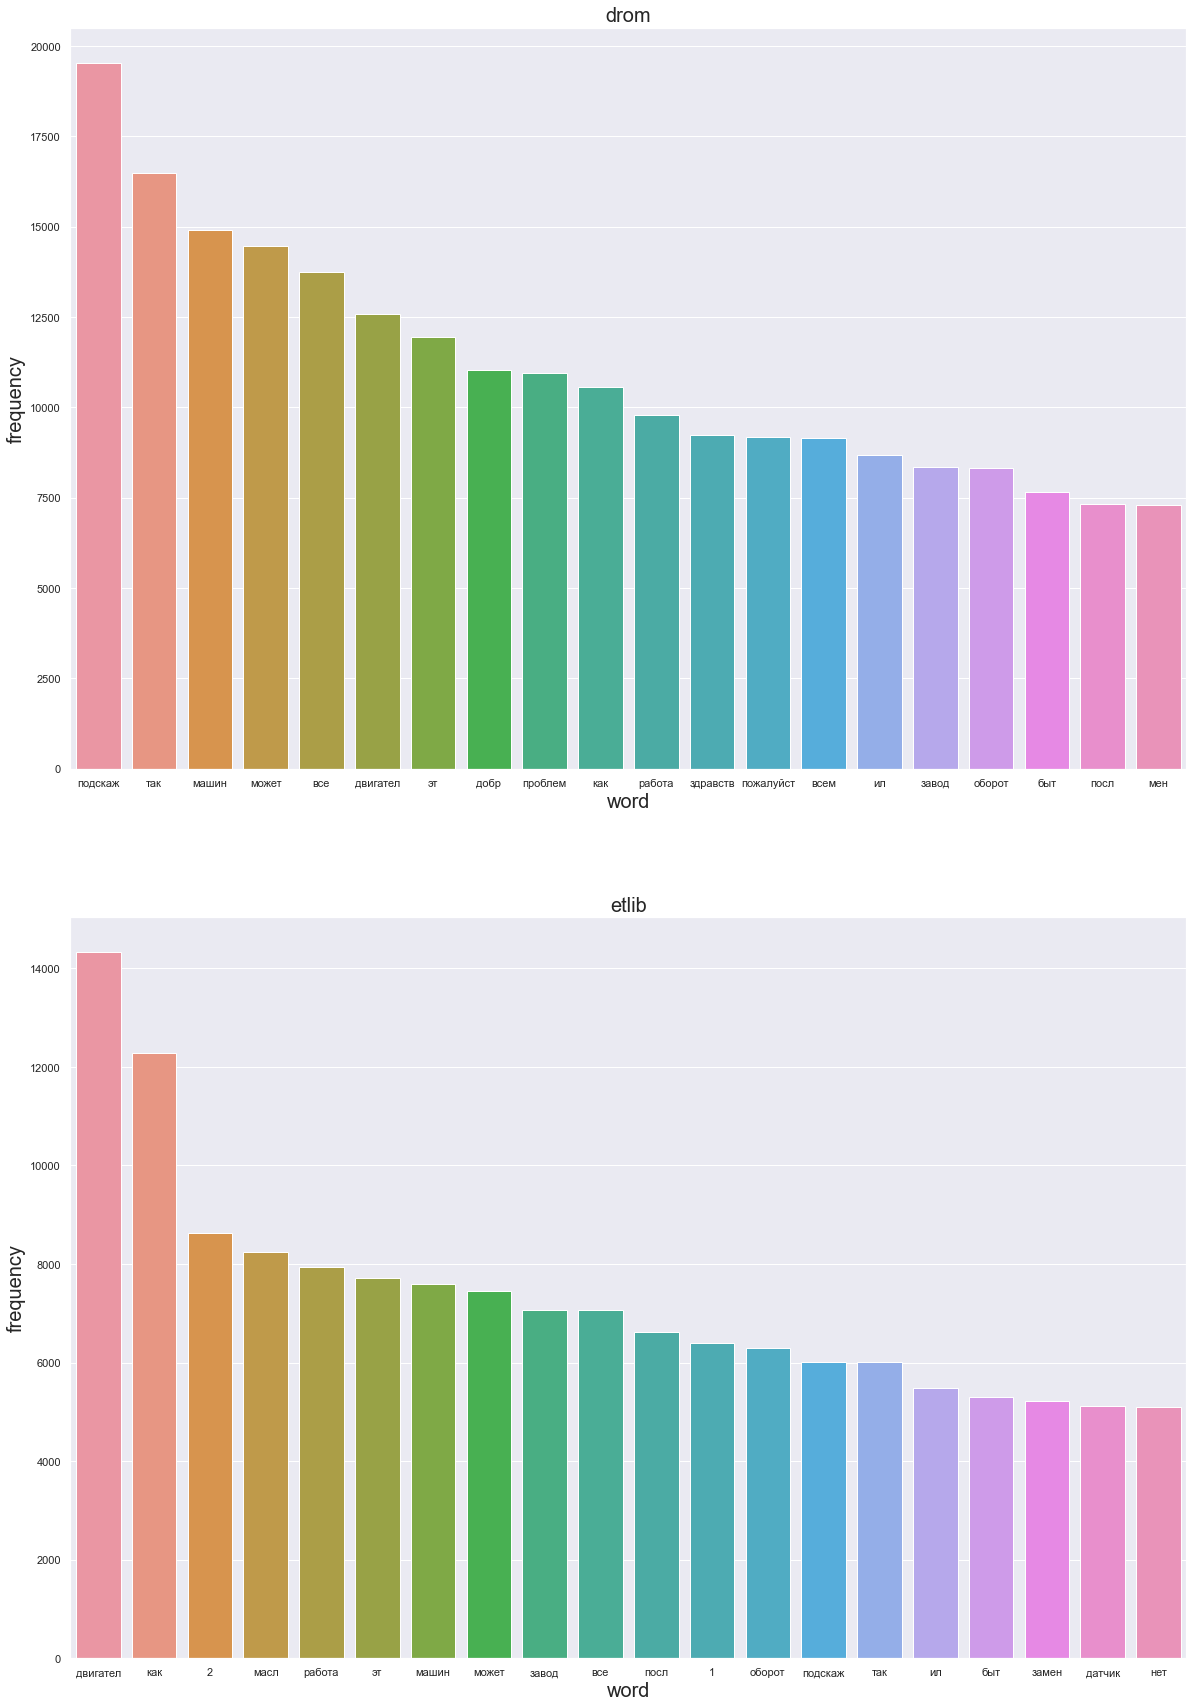

In [113]:
sns.set(rc={'figure.figsize':(20,15*len(processed_dfs)),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
ploti=1

for key in processed_dfs:
    counts_problem=processed_dfs[key]["counts_problem"]
    counts_problem["word"]=counts_problem["word"].swifter.apply(lambda x:SnowballStemmer("russian").stem(x))
    counts_problem=counts_problem.groupby("word").agg({"frequency":np.sum}).sort_values(by="frequency",ascending=False).reset_index()

    print(key)
    display(counts_problem)

    plt.subplot(len(processed_dfs),1,ploti)
    sns.barplot(x=counts_problem.head(20).word,y=counts_problem.head(20).frequency).set(title=key)

    ploti+=1

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

In [114]:
for key in processed_dfs:
    df_processed=processed_dfs[key]["df_processed"]

    #count word frequency (total) by stack every word in one Series and count number of every token in it
    counts_solution=df_processed.solution_tokens.swifter.apply(pd.Series).stack().value_counts().reset_index()
    counts_solution.columns = ['word', 'frequency'] 

    processed_dfs[key]["counts_solution"]=counts_solution

    print(key)
    display(counts_solution)

Pandas Apply: 100%|██████████| 45909/45909 [03:21<00:00, 227.70it/s]  


drom


,word,frequency
0,...,30670
1,это,23357
2,или,23065
3,все,17602
4,может,16708
...,...,...
150104,обсмотрел,1
150105,9554296прадо,1
150106,сиануке,1
150107,пробития,1


Pandas Apply: 100%|██████████| 45439/45439 [00:51<00:00, 886.03it/s]  


etlib


,word,frequency
0,—,22782
1,может,22017
2,или,21473
3,это,20639
4,так,14306
...,...,...
111341,адаптивной,1
111342,02105,1
111343,пиленга,1
111344,96212323,1


Pandas Apply: 100%|██████████| 150109/150109 [00:06<00:00, 23490.21it/s]


drom


,word,frequency
0,эт,42134
1,...,30670
2,так,30509
3,все,27969
4,он,23419
...,...,...
86198,1163220114,1
86199,настраивается,1
86200,настраиват,1
86201,настраиватьдобр,1


Pandas Apply: 100%|██████████| 111346/111346 [00:04<00:00, 24753.13it/s]


etlib


,word,frequency
0,эт,31929
1,так,24393
2,может,23452
3,—,22782
4,ил,21485
...,...,...
56319,dw10ated4,1
56320,ланс,1
56321,ланосопредел,1
56322,ланосовск,1


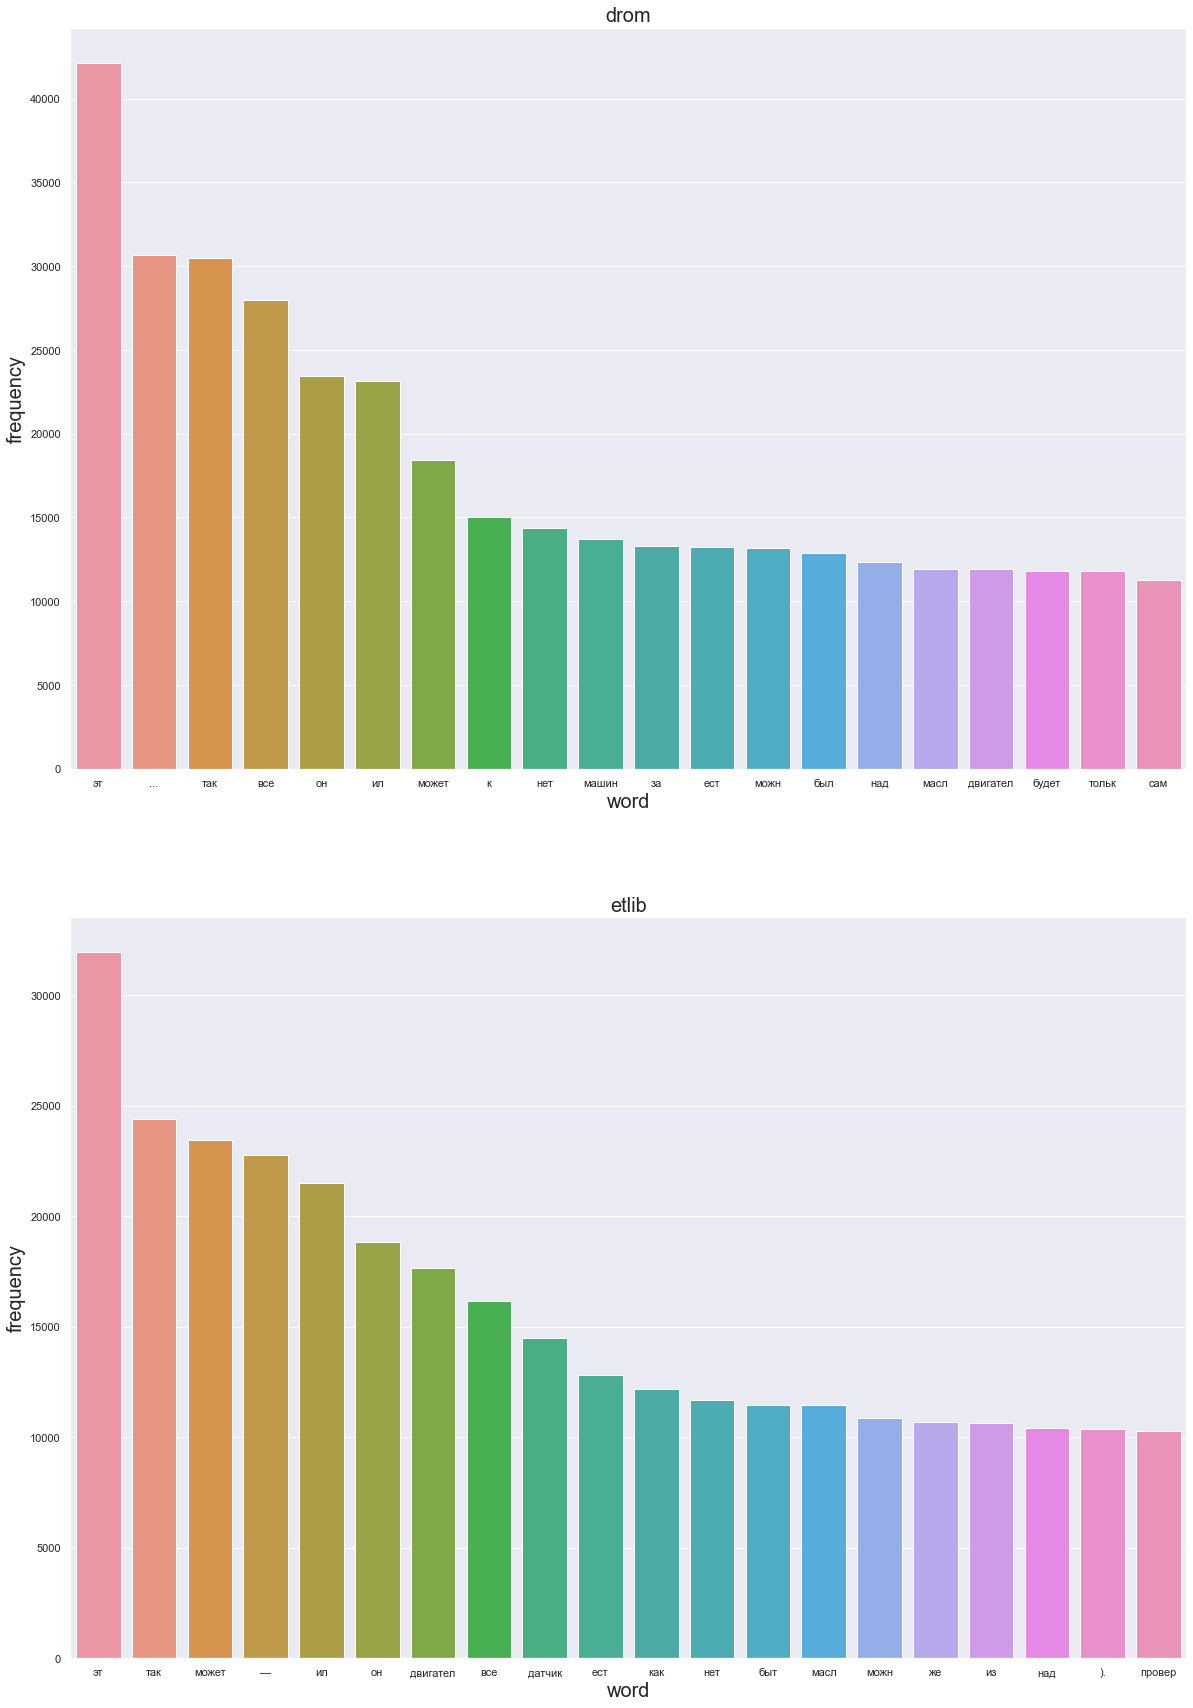

In [115]:
sns.set(rc={'figure.figsize':(20,15*len(processed_dfs)),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
ploti=1

for key in processed_dfs:
    counts_solution=processed_dfs[key]["counts_solution"]

    counts_solution["word"]=counts_solution["word"].swifter.apply(lambda x:SnowballStemmer("russian").stem(x))
    counts_solution=counts_solution.groupby("word").agg({"frequency":np.sum}).sort_values(by="frequency",ascending=False).reset_index()

    print(key)
    display(counts_solution)

    plt.subplot(len(processed_dfs),1,ploti)
    sns.barplot(x=counts_solution.head(20).word,y=counts_solution.head(20).frequency).set(title=key)

    ploti+=1

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})